In [1]:
import pandas as pd
import numpy as np
from tqdm import tqdm_notebook as tqdm

In [2]:
df = pd.read_csv('heloc_dataset_v1.csv')

In [3]:
df

RiskPerformance  ExternalRiskEstimate  MSinceOldestTradeOpen  \
0                 Bad                    55                    144   
1                 Bad                    61                     58   
2                 Bad                    67                     66   
3                 Bad                    66                    169   
4                 Bad                    81                    333   
5                 Bad                    59                    137   
6                Good                    54                     88   
7                Good                    68                    148   
8                 Bad                    59                    324   
9                 Bad                    61                     79   
10               Good                    82                     96   
11                Bad                    50                    311   
12                Bad                    74                    274   
13               Good                    69                    256   
14                Bad                    63                    262   
15                Bad                    63                    184   
16                Bad                    61                    256   
17                Bad                    62                    131   
18                Bad                    89                    244   
19                Bad                    65                     43   
20                Bad                    57                    147   
21                Bad                    72                    365   
22               Good                    72                     84   
23                Bad                    65                     88   
24                Bad                    64                     91   
25                Bad                    58                    265   
26                Bad                    58                    150   
27                Bad                    79                    162   
28                Bad                    66                    284   
29                Bad                    69                    476   
...               ...                   ...                    ...   
10429            Good                    77                    168   
10430            Good                    88                    258   
10431             Bad                    89                    272   
10432            Good                    -9                     -9   
10433            Good                    72                    202   
10434            Good                    82                    434   
10435            Good                    84                    127   
10436            Good                    82                    115   
10437            Good                    -9                     -9   
10438            Good                    79                    120   
10439            Good                    79                    224   
10440            Good                    75                    162   
10441            Good                    71                    155   
10442            Good                    92                    424   
10443            Good                    76                    353   
10444             Bad                    76                     82   
10445            Good                    84                    264   
10446            Good                    75                    171   
10447            Good                    93                    417   
10448            Good                    80                     95   
10449            Good                    57                    176   
10450            Good                    84                    313   
10451            Good                    79                    133   
10452            Good                    90                    197   
10453             Bad                    75                    410   
10454           

In [4]:
bdf = {df.RiskPerformance.name: df.RiskPerformance.astype('category').cat.codes} # bad -> 0, good -> 1

In [5]:
from sklearn.preprocessing import normalize

In [6]:
for col in df.columns[1:]:
    col = df[col]
    name = col.name
    bucket_size = int((max(col) - min(col))/5)
    bucket_col = col.apply(lambda val: int(val/bucket_size)) # first reduce it to 5 or so distinct codes
    bucket_col = normalize(bucket_col.values, norm='max')[0] # then normalize them however we want
    bdf[name] = bucket_col

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:429: DataConversionWarning: Data with input dtype int64 was converted to float64 by the normalize function.
  warnings.warn(msg, _DataConversionWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/

In [7]:
from collections import defaultdict

keep the mapping of the transformed features into the original data ranges

In [8]:
col_bucket_range_map = {}
for col in df.columns[1:]:
    orig_col = df[col]
    b_col = bdf[col]
    batch_col_values = defaultdict(list)
    for batch_val, orig_val in zip(b_col, orig_col):
        batch_col_values[batch_val].append(orig_val)
    batch_col_range = {batch_val: (min(orig_vals), max(orig_vals)) for batch_val, orig_vals in batch_col_values.items()}
    col_bucket_range_map[col] = batch_col_range

In [9]:
col_bucket_range_map

{'AverageMInFile': {0.0: (-9, 77),
  0.25: (78, 155),
  0.5: (156, 233),
  0.75: (234, 275),
  1.0: (322, 383)},
 'ExternalRiskEstimate': {0.0: (-9, -9),
  0.25: (33, 39),
  0.5: (40, 59),
  0.75: (60, 79),
  1.0: (80, 94)},
 'MSinceMostRecentDelq': {0.0: (-9, 17),
  0.25: (18, 35),
  0.5: (36, 53),
  0.75: (54, 71),
  1.0: (72, 83)},
 'MSinceMostRecentInqexcl7days': {-0.25: (-9, -7),
  0.0: (0, 5),
  0.25: (6, 11),
  0.5: (12, 17),
  0.75: (18, 23),
  1.0: (24, 24)},
 'MSinceMostRecentTradeOpen': {0.0: (-9, 77),
  0.25: (79, 152),
  0.5: (156, 227),
  1.0: (383, 383)},
 'MSinceOldestTradeOpen': {0.0: (-9, 161),
  0.25: (162, 323),
  0.5: (324, 485),
  0.75: (488, 604),
  1.0: (789, 803)},
 'MaxDelq2PublicRecLast12M': {-1.0: (-9, -9),
  0.0: (0, 2),
  0.33333333333333331: (3, 5),
  0.66666666666666663: (6, 7),
  1.0: (9, 9)},
 'MaxDelqEver': {-1.5: (-9, -9), 0.0: (2, 2), 0.5: (3, 5), 1.0: (6, 8)},
 'NetFractionInstallBurden': {0.0: (-9, 95),
  0.25: (96, 190),
  0.5: (196, 196),
  1.0:

In [10]:
bdf = pd.DataFrame(bdf)

In [43]:
y = bdf.RiskPerformance.values

In [44]:
X = bdf.drop('RiskPerformance', axis=1).values

In [45]:
np.random.seed(1234)
shuffle_idx = np.random.permutation(len(y))

In [46]:
y = y[shuffle_idx]

In [47]:
X = X[shuffle_idx]

train our model

In [16]:
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

In [17]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import roc_auc_score

In [85]:
def train_svm(X, y):
    svm = SVC(probability=True)
    svm.fit(X, y)
    return svm

train the global black box model on the original data

In [86]:
svm = train_svm(X, y)

In [88]:
type(svm) is SVC

True

In [19]:
lr = LogisticRegression(n_jobs=-1)
lr.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=-1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [20]:
def error(model, X, y):
    y_pred = model.predict_proba(X)
    class_idx = np.argwhere(model.classes_ == 1)[0]
    class_prob = y_pred[:, class_idx] # get the probabilities of the class label 1
    error = 1 - roc_auc_score(y, class_prob)
    return error

randomly shuffle X beforehand, incase there is a pattern

In [21]:
def feature_importance(model, X, y):
    feature_importances = []
    global_error = error(model, X, y)
    for col in range(len(X[0])):
        X_perm = X.copy()
        X_perm[: , col] = X_perm[: , col][::-1] #permute the columns by reversing the order
        
        feature_error = error(model, X_perm, y)
        feature_importance = feature_error/global_error
        
        feature_importances.append(feature_importance)
    return np.array(feature_importances) / np.sum(feature_importances)

maybe normalize feature importance, some features more important error

In [22]:
from treelib import Node, Tree

Store all the paths within the tree

In [23]:
def data_subsets(X, y, col_num, col_val, eq_to_col_val = True):
    if eq_to_col_val:
        bool_idx = X[:, col_num] == col_val
    else:
        bool_idx = X[:, col_num] != col_val
    X_sub = X[bool_idx]
    y_sub = y[bool_idx]
    return X_sub, y_sub

In [89]:
def best_fi_split(model, X, y, prev_fi, context_size_booster):
    
    if prev_fi is None:
        prev_fi = feature_importance(model, X, y)
    best_fi = None
    best_fi_delta = 0
    best_fi_delta_unnorm = 0
    best_col_split = None
    best_col_val_split = None
    
    for col_num in range(X.shape[1]):
        for col_val in set(X[:, col_num]):
            # at this level we are interested to see if the explanations for this context differs from
            # the previous parent context. We can leave the context column in as it is non-informative
            X_sub, y_sub = data_subsets(X, y, col_num, col_val)
            
            # don't run svm on data with 1 class
            if len(set(y_sub)) == 1:
                continue
                
            contextual_fi = feature_importance(model, X_sub, y_sub)
            
            # delta will be computed by the L2 norm plus a size regulaizer. We observe that without this 
            # size penalty, the procedure will usually return a very small context that deviates from
            # the previous (large) parent context, thus we have a term to control this behavior. 
            # fi_delta = np.linalg.norm(prev_fi - contextual_fi) + context_size_reg * np.log(len(y_sub))
            fi_delta = np.linalg.norm(prev_fi - contextual_fi, ord=1) * np.log(len(y_sub))**context_size_booster
            if fi_delta > best_fi_delta:
                best_fi = contextual_fi
                best_fi_delta = fi_delta
                best_fi_delta_unnorm = np.linalg.norm(prev_fi - contextual_fi, ord=1)
                best_col_split = col_num
                best_col_val_split = col_val
#         print(f"col num {col_num}")
                
    
    return best_fi, best_fi_delta, best_fi_delta_unnorm, best_col_split, best_col_val_split

In [101]:
def compute_contexts(model, X, y, prev_fi, parent, threshold=1e-3, max_depth=5, max_nodes=75, context_size_booster=1.0):
    if tree.depth(node = parent) == max_depth or len(tree) > max_nodes or len(set(y)) <= 1:
        return
                
    best_fi, best_fi_delta, best_fi_delta_unnorm, best_col_split, best_col_val_split = best_fi_split(model, X, y, prev_fi, context_size_booster)
            
    if best_fi_delta < threshold: # a further context split will not be informative, stop here
        return
    
    X_sub, y_sub = data_subsets(X, y, best_col_split, best_col_val_split)
    X_sub_inv, y_sub_inv = data_subsets(X, y, best_col_split, best_col_val_split, eq_to_col_val=False)  
    
    best_col_name = bdf.columns[best_col_split]
    best_split_node_name = f"{best_col_name}: {col_bucket_range_map[best_col_name][best_col_val_split]}, dist={pd.Series(y_sub).value_counts().to_dict()}"
    print(f"split at {best_split_node_name}")
    other_split_node_name = f"others, dist={pd.Series(y_sub_inv).value_counts().to_dict()}"

    split_node = tree.create_node(best_split_node_name, parent=parent)
    other_node = tree.create_node(other_split_node_name, parent=parent)
    
    compute_contexts(model, X_sub, y_sub, best_fi, split_node.identifier)
    
    # for the data not in the most distinctive context, find the next best context and so on  
    compute_contexts(model, X_sub_inv, y_sub_inv, prev_fi, other_node.identifier)

In [117]:
tree = Tree()
tree.create_node("Global", "global")
compute_contexts(lr, X, y, None, "global", context_size_booster=3)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel/__main__.py:9: RuntimeWarning: invalid value encountered in double_scalars
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel/__main__.py:9: RuntimeWarning: divide by zero encountered in double_scalars


split at NumBank2NatlTradesWHighUtilization: (-9, -8), dist={0: 746, 1: 425}
split at NumSatisfactoryTrades: (34, 50), dist={1: 3, 0: 2}
split at NumTradesOpeninLast12M: (0, 4), dist={1: 2, 0: 2}
split at ExternalRiskEstimate: (60, 79), dist={1: 2, 0: 1}
split at NetFractionRevolvingBurden: (48, 95), dist={1: 1, 0: 1}
split at NumInstallTradesWBalance: (1, 5), dist={0: 365, 1: 130}
split at PercentTradesNeverDelq: (-9, 20), dist={0: 4, 1: 2}
split at NumTrades60Ever2DerogPubRec: (0, 4), dist={0: 3, 1: 2}
split at MSinceMostRecentInqexcl7days: (6, 11), dist={1: 11, 0: 11}
split at MaxDelq2PublicRecLast12M: (0, 2), dist={0: 11, 1: 2}
split at AverageMInFile: (78, 155), dist={0: 5, 1: 1}
split at MSinceMostRecentDelq: (36, 53), dist={0: 7, 1: 1}
split at NumRevolvingTradesWBalance: (24, 29), dist={0: 5, 1: 2}
split at MSinceMostRecentDelq: (-9, 17), dist={0: 4, 1: 2}
split at NumTotalTrades: (44, 65), dist={1: 2, 0: 2}
split at MSinceMostRecentInqexcl7days: (0, 5), dist={1: 2, 0: 1}
split

With increased context_size_booster, we see that the size of the contexts increase as well. This is a perference that we have to set. Do we want to look at:
* Larger more general groups that we can analyze, context_size_booster > 1
* Small groups that do have different explanations that are typically overlooked, context_size_booster <= 1

N=500

In [413]:
tree.show()

Global
├── ExternalRiskEstimate: [60, 79], dist={1: 163, 0: 123}
│   ├── NumRevolvingTradesWBalance: [8, 15], dist={0: 17, 1: 15}
│   │   ├── NumBank2NatlTradesWHighUtilization: [0, 4], dist={1: 13, 0: 12}
│   │   │   ├── ExternalRiskEstimate: [60, 79], dist={1: 13, 0: 12}
│   │   │   │   ├── AverageMInFile: [78, 155], dist={1: 6, 0: 3}
│   │   │   │   └── others, dist={0: 9, 1: 7}
│   │   │   └── others, dist={}
│   │   └── others, dist={0: 5, 1: 2}
│   │       ├── ExternalRiskEstimate: [60, 79], dist={0: 5, 1: 2}
│   │       │   ├── NumBank2NatlTradesWHighUtilization: [5, 9], dist={0: 5, 1: 2}
│   │       │   └── others, dist={}
│   │       └── others, dist={}
│   └── others, dist={1: 148, 0: 106}
│       ├── PercentTradesNeverDelq: [63, 83], dist={0: 18, 1: 15}
│       │   ├── NumTotalTrades: [-9, 21], dist={0: 15, 1: 8}
│       │   │   ├── MSinceMostRecentInqexcl7days: [0, 5], dist={0: 8, 1: 7}
│       │   │   └── others, dist={0: 7, 1: 1}
│       │   └── others, dist={1: 7, 0: 3}


In [402]:
tree.show()

Global
├── MSinceMostRecentDelq: [18, 35], dist={1: 26, 0: 22}
│   ├── MSinceMostRecentInqexcl7days: [0, 5], dist={1: 18, 0: 11}
│   │   ├── PercentInstallTrades: [21, 41], dist={1: 11, 0: 4}
│   │   │   ├── NumTrades90Ever2DerogPubRec: [0, 4], dist={1: 11, 0: 4}
│   │   │   │   ├── NetFractionRevolvingBurden: [-9, 47], dist={1: 8, 0: 3}
│   │   │   │   └── others, dist={1: 3, 0: 1}
│   │   │   └── others, dist={}
│   │   └── others, dist={1: 7, 0: 7}
│   │       ├── MSinceMostRecentDelq: [18, 35], dist={1: 7, 0: 7}
│   │       │   ├── NumInstallTradesWBalance: [1, 5], dist={0: 7, 1: 4}
│   │       │   └── others, dist={1: 3}
│   │       └── others, dist={}
│   └── others, dist={0: 11, 1: 8}
│       ├── MSinceMostRecentDelq: [18, 35], dist={0: 11, 1: 8}
│       │   ├── PercentTradesNeverDelq: [84, 100], dist={0: 10, 1: 6}
│       │   │   ├── NumRevolvingTradesWBalance: [0, 7], dist={0: 8, 1: 6}
│       │   │   └── others, dist={0: 2}
│       │   └── others, dist={1: 2, 0: 1}
│       │ 

In [400]:
tree.show()

Global
├── PercentInstallTrades: [63, 83], dist={0: 15, 1: 12}
│   ├── NetFractionInstallBurden: [-9, 95], dist={0: 15, 1: 10}
│   │   ├── NumTrades60Ever2DerogPubRec: [0, 4], dist={0: 13, 1: 10}
│   │   │   ├── NumInstallTradesWBalance: [1, 5], dist={0: 13, 1: 9}
│   │   │   │   ├── NumBank2NatlTradesWHighUtilization: [0, 4], dist={0: 10, 1: 9}
│   │   │   │   └── others, dist={0: 3}
│   │   │   └── others, dist={1: 1}
│   │   └── others, dist={0: 2}
│   └── others, dist={1: 2}
└── others, dist={1: 314, 0: 159}
    ├── MaxDelqEver: [2, 2], dist={0: 12, 1: 10}
    │   ├── MSinceMostRecentTradeOpen: [-9, 77], dist={0: 12, 1: 10}
    │   │   ├── PercentTradesWBalance: [84, 100], dist={0: 5, 1: 2}
    │   │   │   ├── ExternalRiskEstimate: [60, 79], dist={1: 2, 0: 2}
    │   │   │   └── others, dist={0: 3}
    │   │   └── others, dist={1: 8, 0: 7}
    │   │       ├── NumInstallTradesWBalance: [1, 5], dist={1: 6, 0: 6}
    │   │       └── others, dist={1: 2, 0: 1}
    │   └── others, dist={

### View the FI delta with respect to the contex size booster

In [179]:
ci_deltas = []
ci_sizes = []
test_ci_boosters = np.arange(0, 10, 0.2)
for context_size_booster in test_ci_boosters:
    best_fi, best_fi_delta, best_fi_delta_unnorm, best_col_split, best_col_val_split = best_fi_split(lr, X, y, None, context_size_booster)
    X_sub, y_sub = data_subsets(X, y, best_col_split, best_col_val_split)
    ci_deltas.append(best_fi_delta_unnorm)
    ci_sizes.append(len(y_sub))

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel/__main__.py:9: RuntimeWarning: invalid value encountered in double_scalars
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel/__main__.py:9: RuntimeWarning: divide by zero encountered in double_scalars


In [107]:
plt.rcParams['font.size']

10.0

In [118]:
plt.rcParams['lines.linewidth']

1.5

In [126]:
plt.rcParams.update({'lines.linewidth': 1.5})
plt.rcParams.update({'font.size': 10})

In [151]:
plt.rcParams.update({'lines.linewidth': 5})
plt.rcParams.update({'font.size': 40})

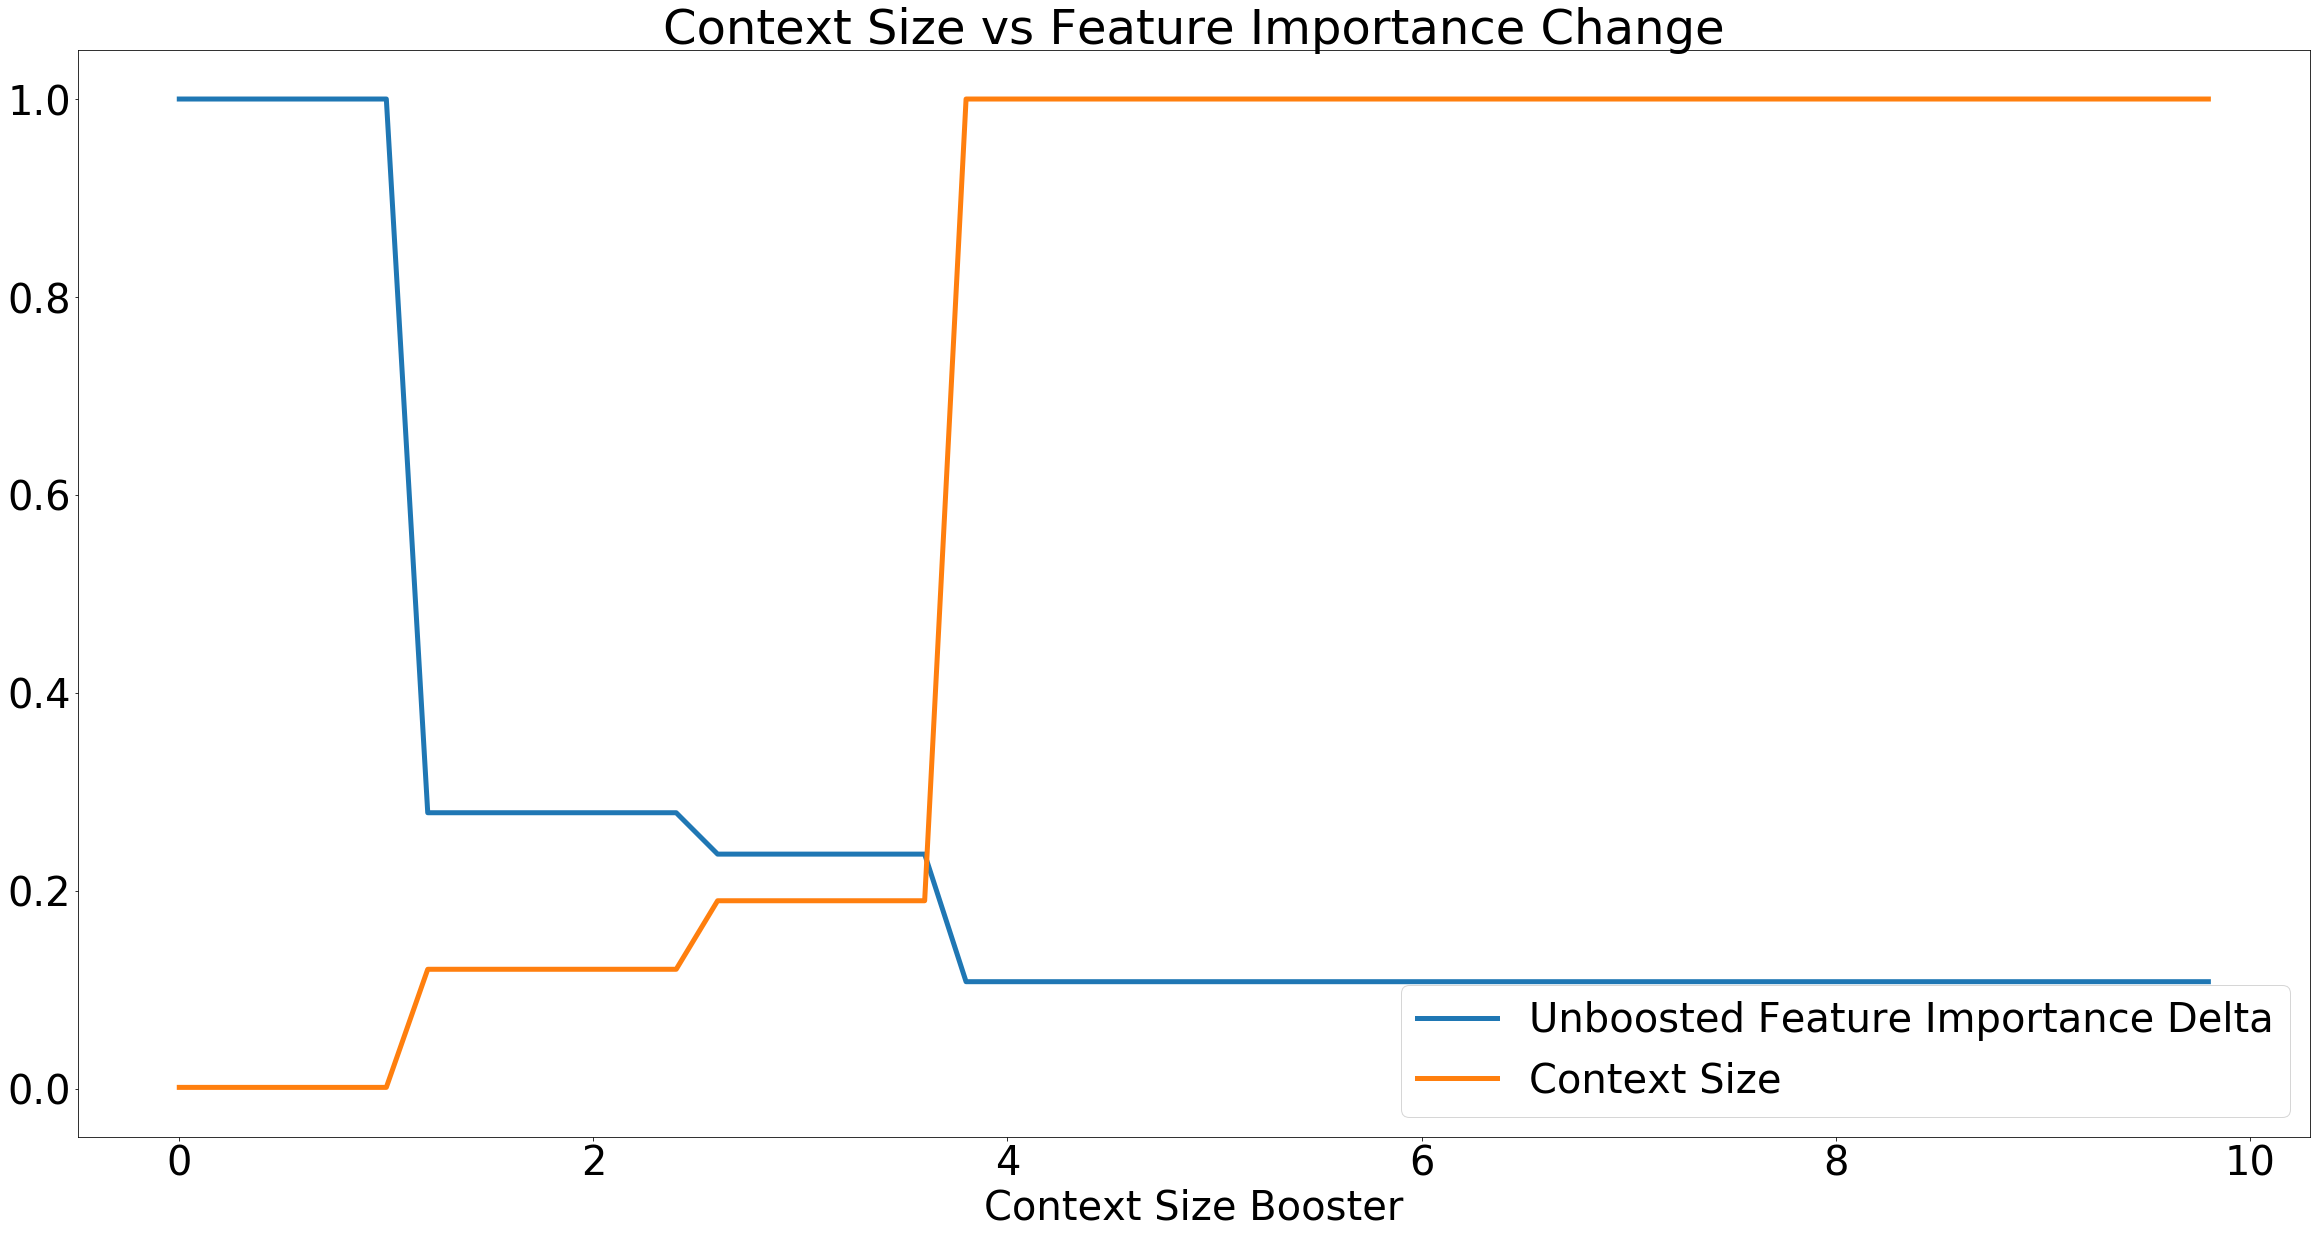

In [180]:
plt.figure(figsize=(40, 20))
plt.plot(test_ci_boosters, np.array(ci_deltas)/np.max(ci_deltas), label='Unboosted Feature Importance Delta')
plt.plot(test_ci_boosters, np.array(ci_sizes)/np.max(ci_sizes), label='Context Size')
plt.title('Context Size vs Feature Importance Change')
plt.xlabel('Context Size Booster')
plt.legend()
plt.show()

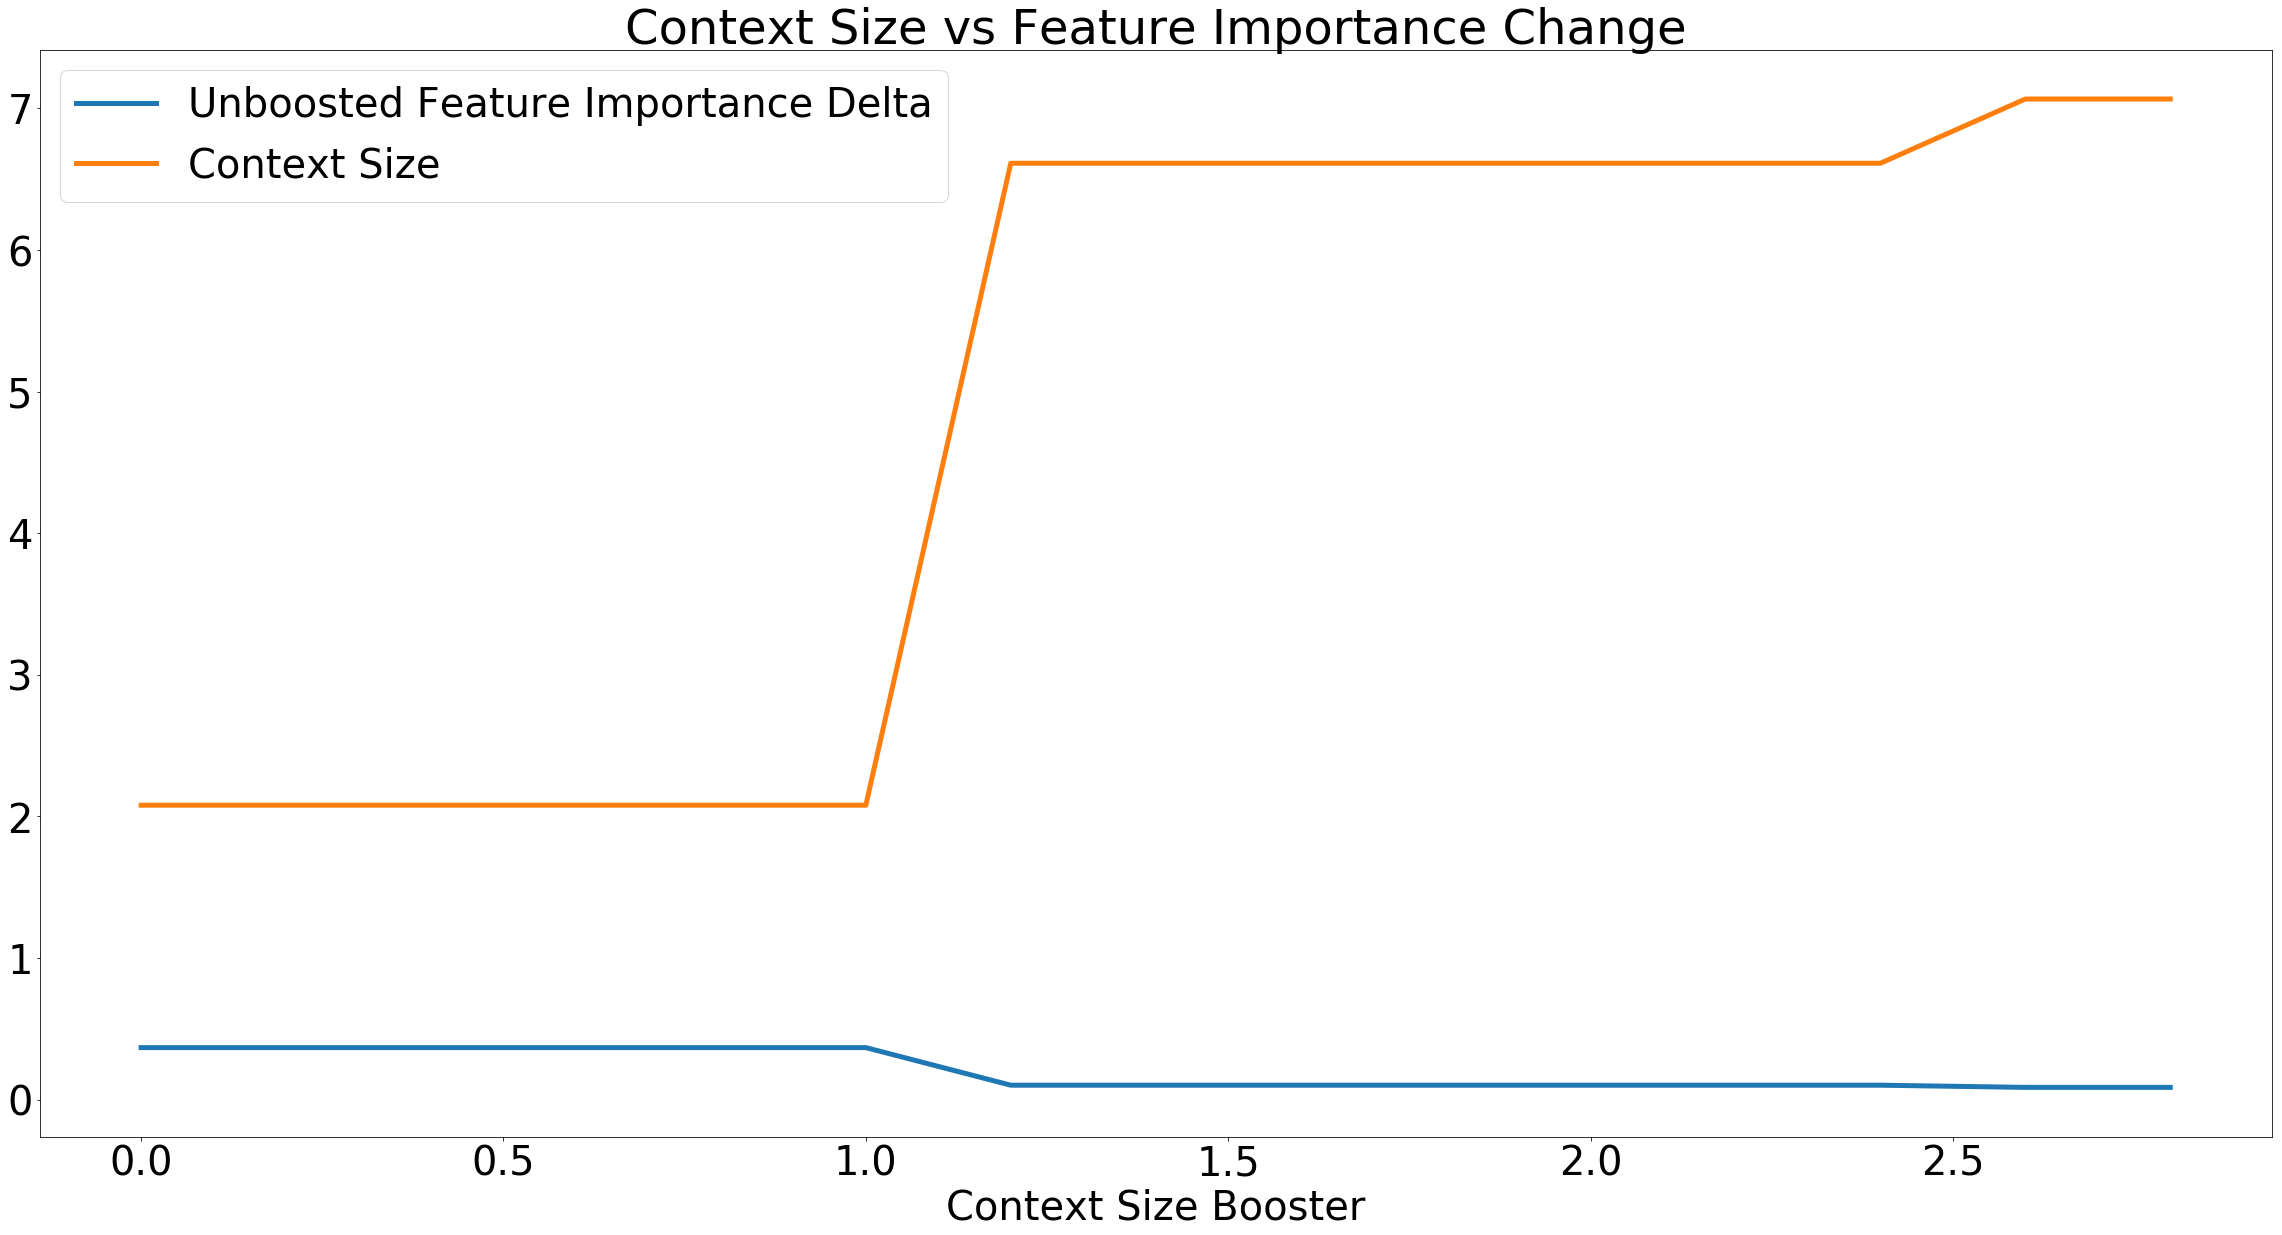

In [178]:
plt.figure(figsize=(40, 20))
plt.plot(test_ci_boosters, np.array(ci_deltas)/np.max(ci_deltas), label='Unboosted Feature Importance Delta')
plt.plot(test_ci_boosters, np.array(ci_sizes)/np.max(ci_sizes), label='Context Size')
plt.title('Context Size vs Feature Importance Change')
plt.xlabel('Context Size Booster')
plt.legend()
plt.show()

In [176]:
np.array(ci_sizes)

array([   8,    8,    8,    8,    8,    8,  744,  744,  744,  744,  744,
        744,  744, 1171, 1171])

Here we see the as we add the context size boost, the contexts do get bigger, but the true L1 difference between the parent and child feature importances decrease. This is with respect the the first feature split, which is supposed to be the one with the highest delta.

Since the contexts with the best CI delta can be arbitrarily small, we have to have large power penalties.

### Compare feature importances between global and contextual data - LR

In [124]:
tree.show()

Global
├── NumBank2NatlTradesWHighUtilization: (-9, -8), dist={0: 746, 1: 425}
│   ├── NumSatisfactoryTrades: (34, 50), dist={1: 3, 0: 2}
│   │   ├── NumTradesOpeninLast12M: (0, 4), dist={1: 2, 0: 2}
│   │   │   ├── ExternalRiskEstimate: (60, 79), dist={1: 2, 0: 1}
│   │   │   │   ├── NetFractionRevolvingBurden: (48, 95), dist={1: 1, 0: 1}
│   │   │   │   └── others, dist={1: 1}
│   │   │   └── others, dist={0: 1}
│   │   └── others, dist={1: 1}
│   └── others, dist={0: 744, 1: 422}
│       ├── NumInstallTradesWBalance: (1, 5), dist={0: 365, 1: 130}
│       │   ├── PercentTradesNeverDelq: (-9, 20), dist={0: 4, 1: 2}
│       │   │   ├── NumTrades60Ever2DerogPubRec: (0, 4), dist={0: 3, 1: 2}
│       │   │   └── others, dist={0: 1}
│       │   └── others, dist={0: 361, 1: 128}
│       │       ├── MSinceMostRecentInqexcl7days: (6, 11), dist={1: 11, 0: 11}
│       │       └── others, dist={0: 350, 1: 117}
│       └── others, dist={0: 379, 1: 292}
│           ├── MaxDelq2PublicRecLast12M: (0

In [141]:
show_feature_importance(lr, X, y, label='Full Dataset', show_plot=False)

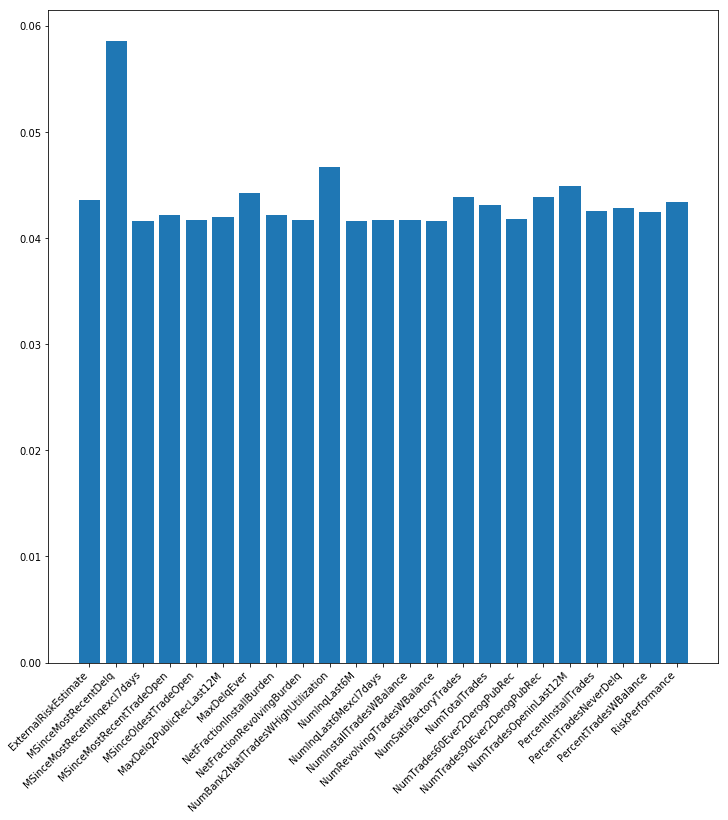

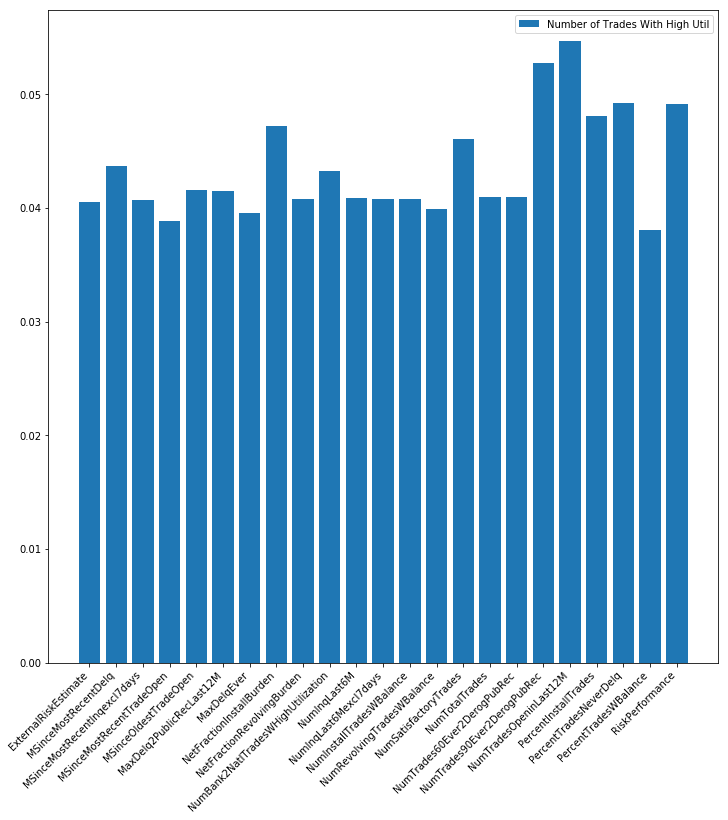

In [142]:
X_sub, y_sub = build_data_subset([(True, 'NumBank2NatlTradesWHighUtilization', (-9, -8))])
show_feature_importance(lr, X_sub, y_sub, label='Number of Trades With High Util', show_plot=False)
plt.legend()
plt.show()

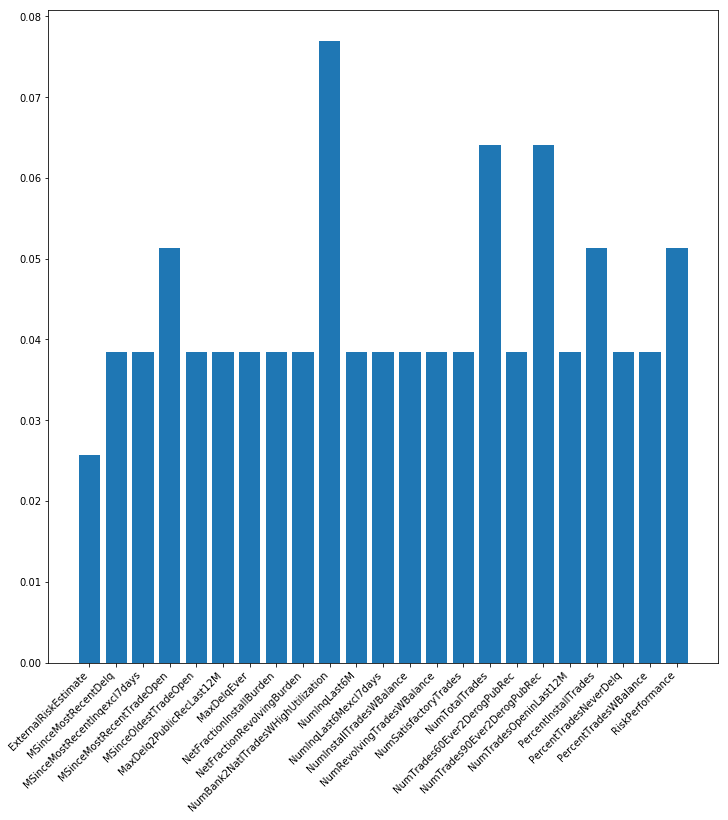

In [132]:
X_sub, y_sub = build_data_subset([(False, 'NumBank2NatlTradesWHighUtilization', (-9, -8)), (True, 'NumRevolvingTradesWBalance', (24, 29))])
show_feature_importance(lr, X_sub, y_sub)

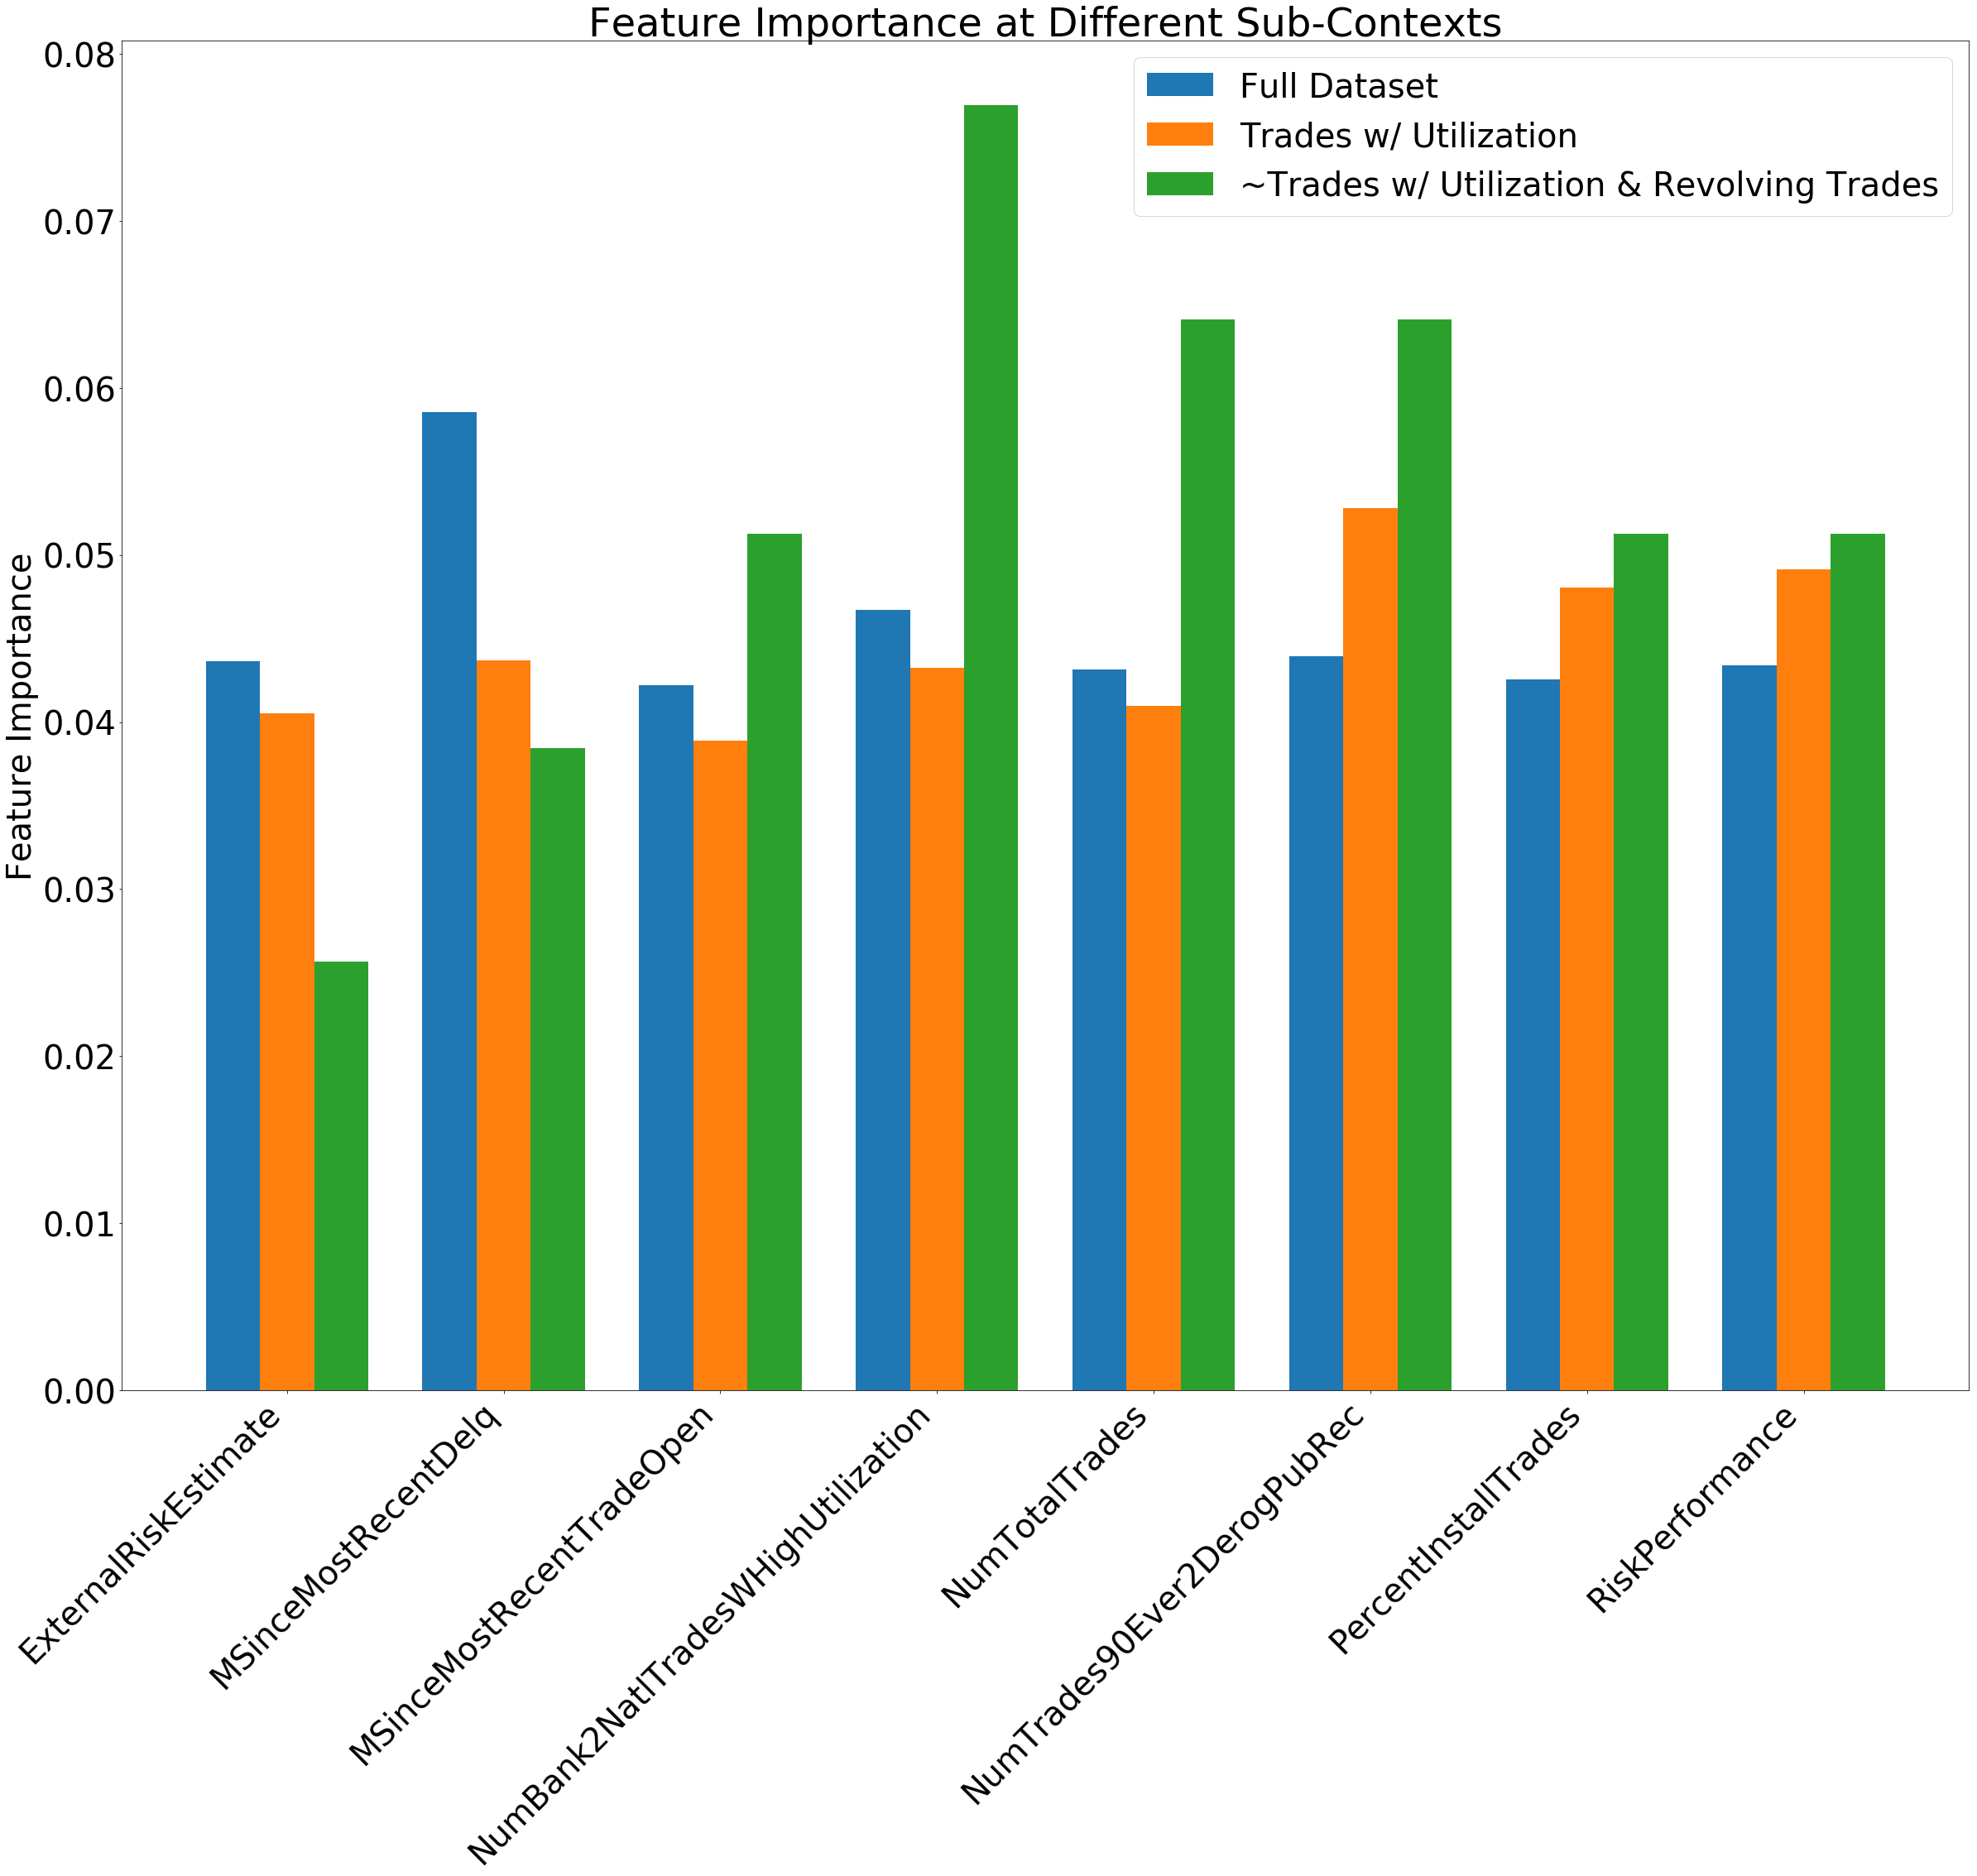

In [172]:
import numpy as np
import matplotlib.pyplot as plt


glob_fi = feature_importance(lr, X, y)
X_sub, y_sub = build_data_subset([(True, 'NumBank2NatlTradesWHighUtilization', (-9, -8))])
best_fi = feature_importance(lr, X_sub, y_sub)
X_sub, y_sub = build_data_subset([(False, 'NumBank2NatlTradesWHighUtilization', (-9, -8)), (True, 'NumRevolvingTradesWBalance', (24, 29))])
next_best_fi = feature_importance(lr, X_sub, y_sub)

sel_arr = np.array([0, 1, 3, 9, 15, 17, 19, 22])
col_names = bdf.columns[1:][sel_arr]

N = len(col_names)
fig, ax = plt.subplots(figsize=(40, 30))
ind = np.arange(N)    # the x locations for the groups
width = 0.25         # the width of the bars

glob = ax.bar(ind, glob_fi[sel_arr], width, label='Full Dataset')
best_split = ax.bar(ind + width, best_fi[sel_arr], width, label='Trades w/ Utilization')
next_best = ax.bar(ind + 2 * width, next_best_fi[sel_arr], width, label='~Trades w/ Utilization & Revolving Trades')

ax.set_title('Feature Importance at Different Sub-Contexts')
ax.set_xticks(ind + width)
ax.set_xticklabels(col_names, rotation = 45, ha="right")
ax.legend()
ax.set_ylabel('Feature Importance')

plt.show()

In [165]:
for i, col in enumerate(bdf.columns[1:]):
    print(col, i)

ExternalRiskEstimate 0
MSinceMostRecentDelq 1
MSinceMostRecentInqexcl7days 2
MSinceMostRecentTradeOpen 3
MSinceOldestTradeOpen 4
MaxDelq2PublicRecLast12M 5
MaxDelqEver 6
NetFractionInstallBurden 7
NetFractionRevolvingBurden 8
NumBank2NatlTradesWHighUtilization 9
NumInqLast6M 10
NumInqLast6Mexcl7days 11
NumInstallTradesWBalance 12
NumRevolvingTradesWBalance 13
NumSatisfactoryTrades 14
NumTotalTrades 15
NumTrades60Ever2DerogPubRec 16
NumTrades90Ever2DerogPubRec 17
NumTradesOpeninLast12M 18
PercentInstallTrades 19
PercentTradesNeverDelq 20
PercentTradesWBalance 21
RiskPerformance 22


In [32]:
import matplotlib.pyplot as plt

In [133]:
def show_feature_importance(model, X, y, label=None, show_plot=True):
#     svm = train_svm(X, y)
    fi = feature_importance(model, X, y)
    
    col_names = bdf.columns[1:]
    col_vals = range(len(col_names))
    plt.figure(figsize=(12, 12))
    plt.bar(col_vals, fi, label=label)
    plt.xticks(col_vals, col_names, rotation = 45, ha="right")
    if show_plot:
        plt.show()

use this to build the subset of the data from the tree view

In [69]:
col_bucket_range_map_rev = {keys: {bounds: val for val, bounds in d.items()} for keys, d in col_bucket_range_map.items()}

In [70]:
def build_data_subset(inclusions):
    X_sub = X.copy()
    y_sub = y.copy()
    
    for include_val, column, value_range in inclusions:
        col_idx = np.argwhere(bdf.columns == column)[0][0]
        col_value = col_bucket_range_map_rev[column][value_range]
        X_sub, y_sub = data_subsets(X_sub, y_sub, col_idx, col_value, eq_to_col_val=include_val)
    
    return X_sub, y_sub


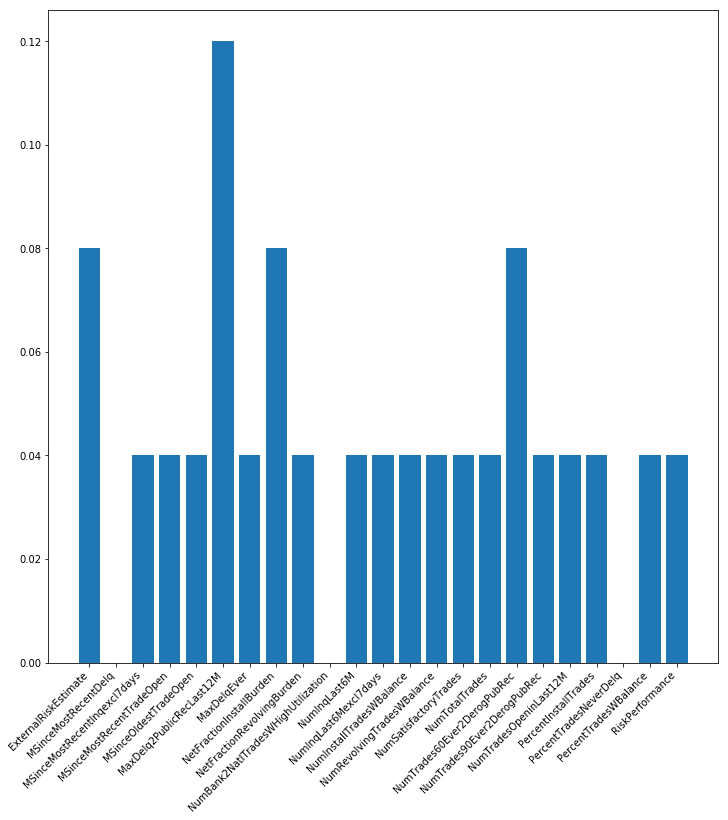

In [39]:
show_feature_importance(lr, *build_data_subset([(False, 'NetFractionInstallBurden', (-9, 95)), (True, 'PercentTradesNeverDelq', (63, 83))]))

### Compare feature importances between global and contextual data - SVM

In [52]:
tree.show()

Global
├── NumTrades60Ever2DerogPubRec: (0, 4), dist={0: 470, 1: 454}
│   ├── NumTotalTrades: (66, 87), dist={1: 4, 0: 4}
│   │   ├── MSinceOldestTradeOpen: (162, 323), dist={0: 3, 1: 2}
│   │   │   ├── MSinceMostRecentInqexcl7days: (-9, -7), dist={0: 2, 1: 1}
│   │   │   │   ├── NetFractionRevolvingBurden: (-9, 47), dist={1: 1, 0: 1}
│   │   │   │   └── others, dist={0: 1}
│   │   │   └── others, dist={1: 1, 0: 1}
│   │   └── others, dist={1: 2, 0: 1}
│   └── others, dist={0: 466, 1: 450}
│       ├── AverageMInFile: (156, 233), dist={0: 14, 1: 12}
│       │   ├── PercentTradesWBalance: (42, 62), dist={1: 6, 0: 3}
│       │   │   ├── NetFractionRevolvingBurden: (-9, 47), dist={1: 6, 0: 2}
│       │   │   └── others, dist={0: 1}
│       │   └── others, dist={0: 11, 1: 6}
│       │       ├── MSinceMostRecentInqexcl7days: (-9, -7), dist={1: 4, 0: 4}
│       │       └── others, dist={0: 7, 1: 2}
│       └── others, dist={0: 452, 1: 438}
│           ├── MSinceMostRecentInqexcl7days: (12, 17

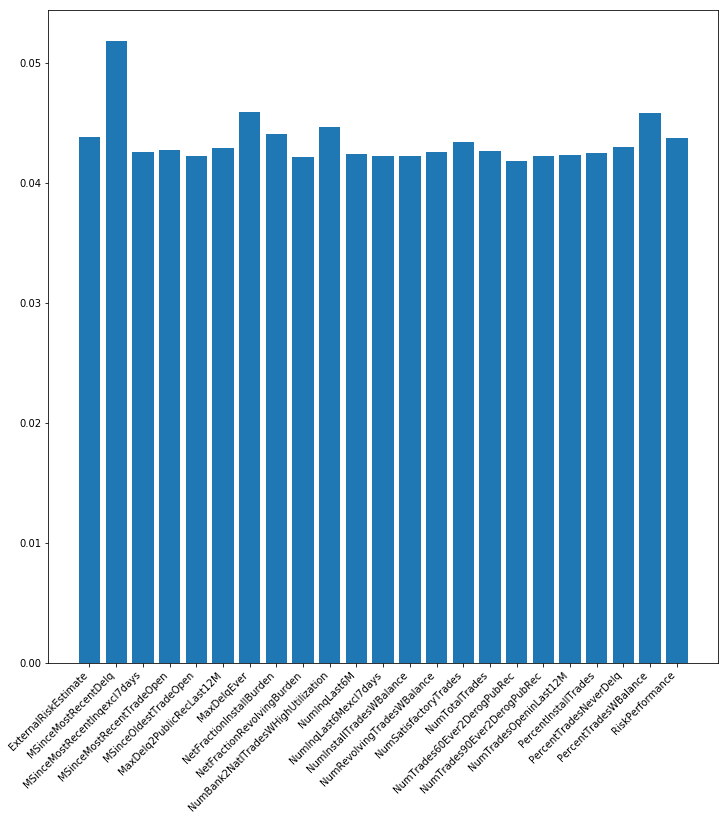

In [59]:
show_feature_importance(X[:1000], y[:1000])

Number Trades 60+ Ever, lower is better

In [65]:
col_bucket_range_map['NumTrades60Ever2DerogPubRec']

{-0.33333333333333331: (-9, -9),
 0.0: (0, 4),
 0.33333333333333331: (5, 9),
 0.66666666666666663: (10, 14),
 1.0: (16, 19)}

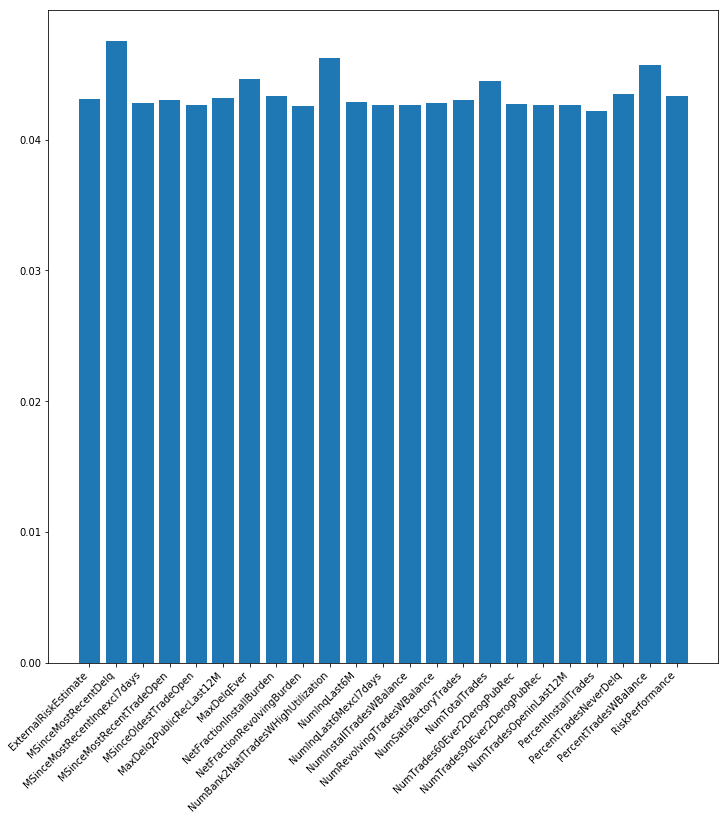

In [60]:
show_feature_importance(*build_data_subset([(True, 'NumTrades60Ever2DerogPubRec', (0, 4))]))

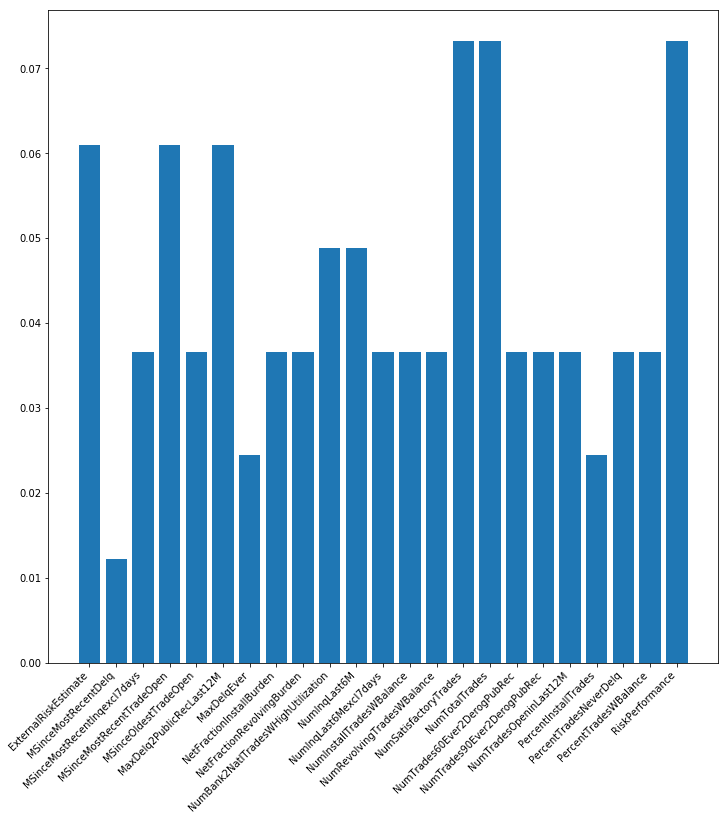

In [63]:
show_feature_importance(*build_data_subset([(True, 'NumTrades60Ever2DerogPubRec', (0, 4)), (True, 'NumTotalTrades', (66, 87))]))

Net Fraction Revolving Burden. This is revolving balance divided by credit limit

In [66]:
col_bucket_range_map['NetFractionRevolvingBurden']

{0.0: (-9, 47),
 0.25: (48, 95),
 0.5: (96, 135),
 0.75: (154, 165),
 1.0: (232, 232)}

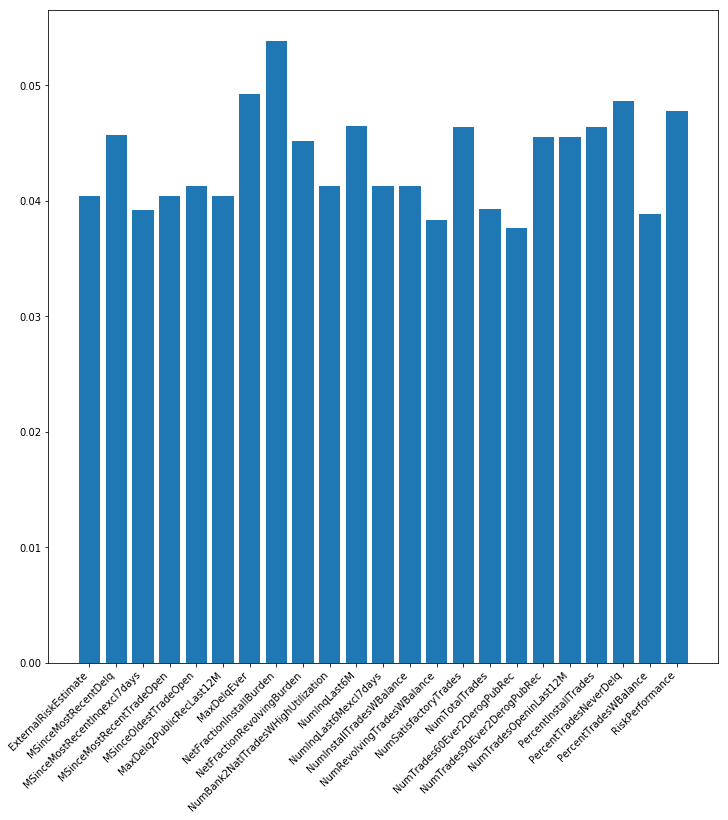

In [64]:
show_feature_importance(*build_data_subset([(False, 'NumTrades60Ever2DerogPubRec', (0, 4)), (True, 'NetFractionRevolvingBurden', (-9, 47))]))

### Compare feature importances between global and contextual data

In [72]:
tree.show()

Global
├── MaxDelqEver: (6, 8), dist={1: 3958, 0: 3574}
│   ├── PercentTradesNeverDelq: (-9, 20), dist={0: 3, 1: 1}
│   └── others, dist={1: 3957, 0: 3571}
│       ├── NumTrades60Ever2DerogPubRec: (10, 14), dist={1: 1, 0: 1}
│       └── others, dist={1: 3956, 0: 3570}
│           ├── AverageMInFile: (322, 383), dist={1: 1, 0: 1}
│           └── others, dist={1: 3955, 0: 3569}
│               ├── NumInstallTradesWBalance: (12, 16), dist={1: 11, 0: 4}
│               └── others, dist={1: 3944, 0: 3565}
└── others, dist={0: 1885, 1: 1042}
    ├── NumRevolvingTradesWBalance: (16, 23), dist={0: 7, 1: 3}
    │   ├── MSinceOldestTradeOpen: (-9, 161), dist={0: 2, 1: 1}
    │   └── others, dist={0: 5, 1: 2}
    │       ├── AverageMInFile: (-9, 77), dist={1: 1, 0: 1}
    │       └── others, dist={0: 4, 1: 1}
    │           ├── MSinceMostRecentDelq: (-9, 17), dist={0: 4, 1: 1}
    │           └── others, dist={}
    └── others, dist={0: 1878, 1: 1039}
        ├── MSinceMostRecentTradeOpen: (79, 

Global

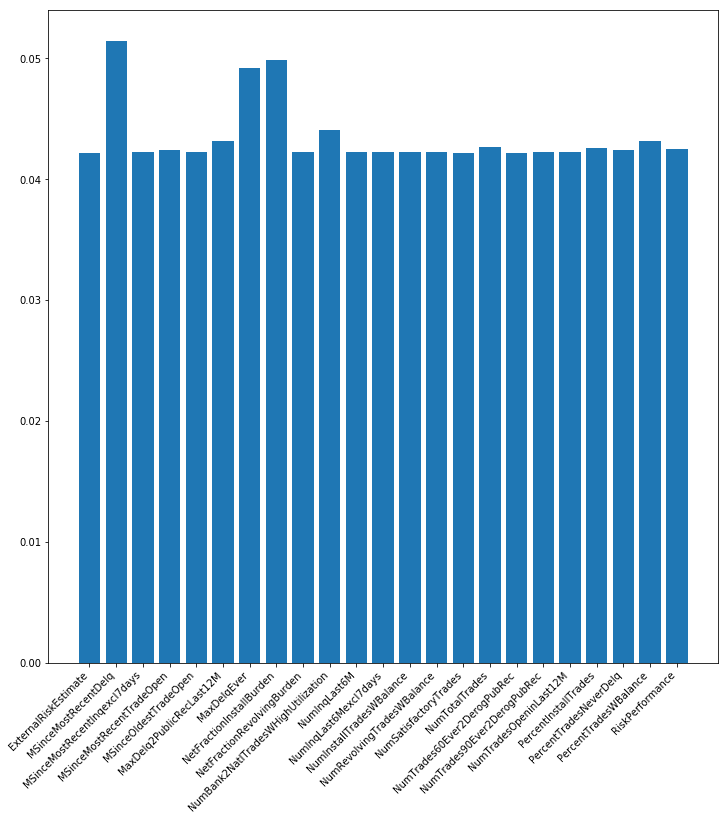

In [78]:
show_feature_importance(X, y)

For the context where MaxDelqEver $\in$ [6, 8], here is the contextual model interpretation. We see that from the global context, the importance for the feature `MSinceMostRecentDelq` varies, Months since the most recently delinquency. This makes sense, if you have historically beeen charged with a crime, it is on permanent record and affects financial well being.

In [82]:
X_sub, y_sub = build_data_subset([(True, 'MaxDelqEver', (6, 8))])

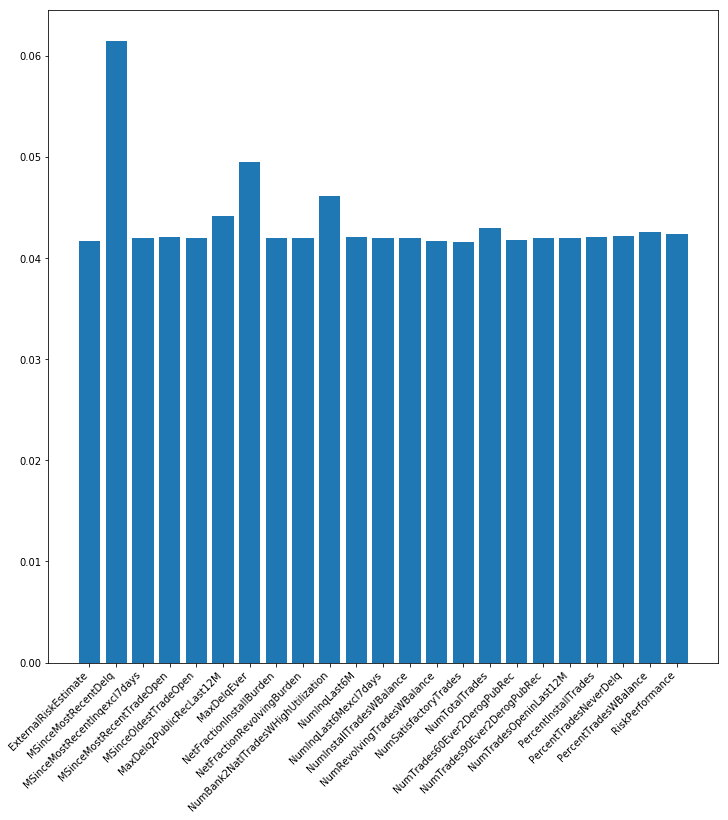

In [83]:
show_feature_importance(X_sub, y_sub)

Those who have records of delinquency and have a certain number of trades
Net Fraction Installment Burden. This is installment balance divided by original loan amount (higher is worse)

In [95]:
col_bucket_range_map['NetFractionInstallBurden']

{0.0: (-9, 95), 0.25: (96, 190), 0.5: (196, 196), 1.0: (471, 471)}

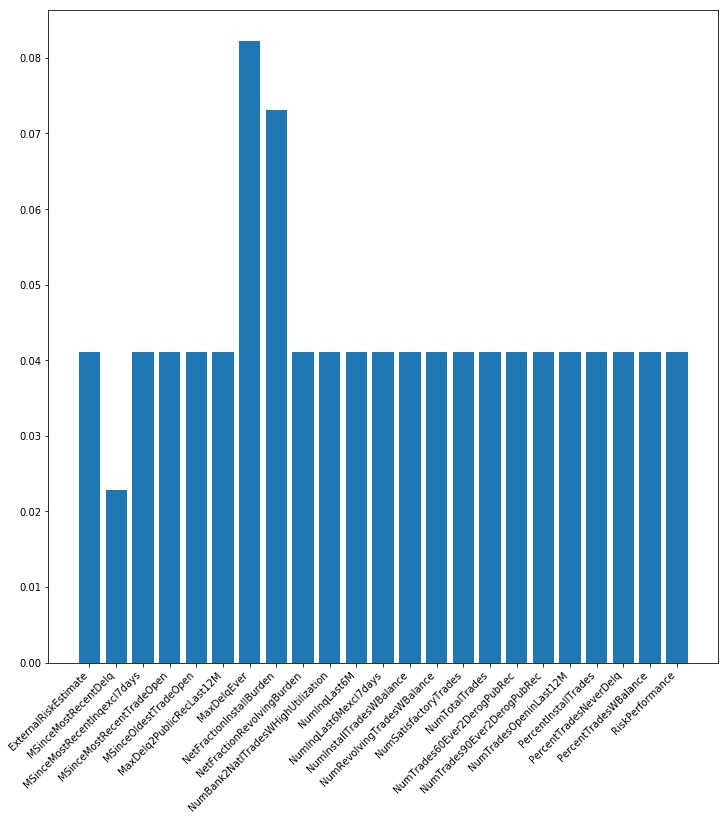

In [86]:
show_feature_importance(*build_data_subset([(False, 'MaxDelqEver', (6, 8)), (True, 'NumRevolvingTradesWBalance', (16, 23))]))

Number Revolving Trades with Balance

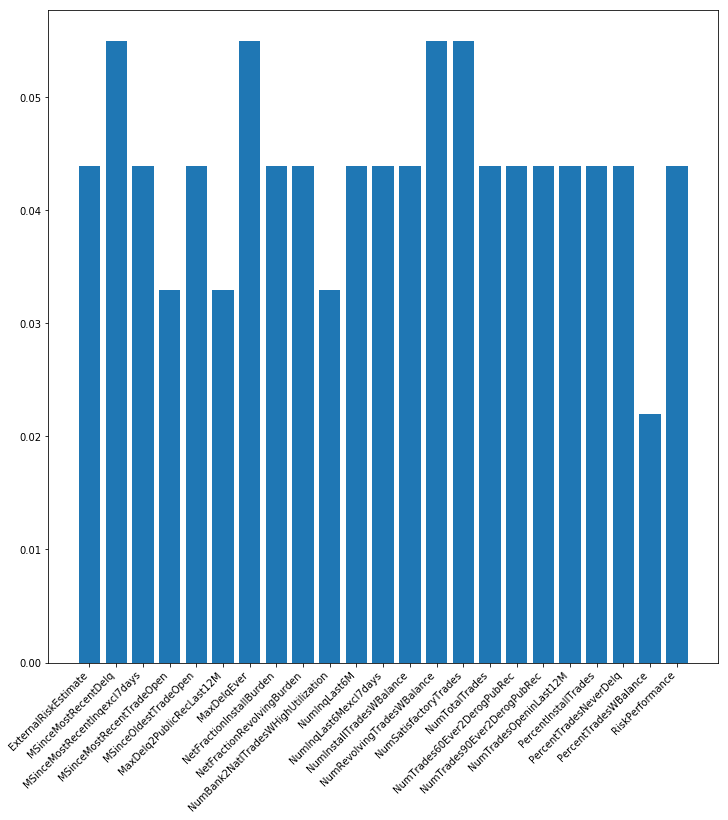

In [96]:
show_feature_importance(*build_data_subset([(False, 'MaxDelqEver', (6, 8)), (False, 'NumRevolvingTradesWBalance', (16, 23)), (True, 'MSinceMostRecentTradeOpen', (79, 152))]))

### Using a decomposable feature importance metric like SHAP

In [472]:
import importlib

In [475]:
importlib.reload(tqdm)

<module 'tqdm' from '/Users/karansamel/Library/Python/3.6/lib/python/site-packages/tqdm/__init__.py'>

In [476]:
import shap

In [469]:
svc_linear = SVC(kernel='rbf', probability=True)
svc_linear.fit(X[:100], y[:100])

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [477]:
explainer = shap.KernelExplainer(svc_linear.predict_proba, X[:100])

In [478]:
shap_values = explainer.shap_values(X[:100])

Widget Javascript not detected.  It may not be installed or enabled properly.


/Users/karansamel/Library/Python/3.6/lib/python/site-packages/shap/explainers/kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


In [ ]:
shap.force_plot(explainer.expected_value[0], shap_values[0], X_test)

In [ ]:


# explain all the predictions in the test set
shap_values = explainer.shap_values(X_test)
shap.force_plot(explainer.expected_value[0], shap_values[0], X_test)

In [493]:
global_fi = np.mean(np.abs(shap_values[0]), axis=0)

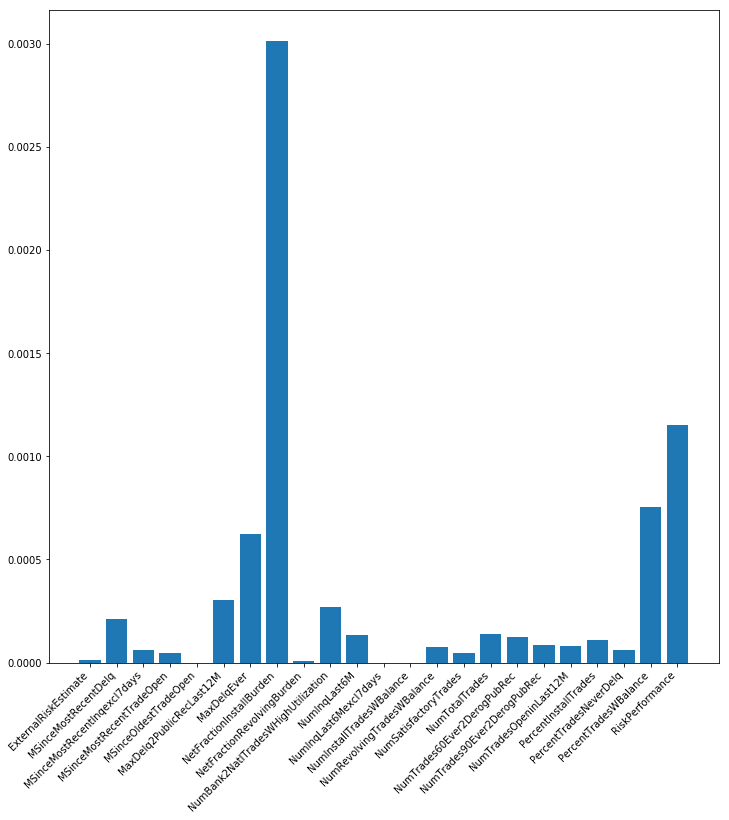

In [494]:
col_names = bdf.columns[1:]
col_vals = range(len(col_names))
plt.figure(figsize=(12, 12))
plt.bar(col_vals, global_fi)
plt.xticks(col_vals, col_names, rotation = 45, ha="right")
plt.show()

In [481]:
shap.initjs()

In [482]:
shap.force_plot(explainer.expected_value[0], shap_values[0], X[:100])